# Linear Regression

We will analyze

* True versus predicted functions
* Shifting and scaling
* Adding additional features
* Regularization

In [160]:
%matplotlib inline
import localutils as lu
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

## 1-Feature Case

In [161]:
# Size of the dataset
N = 100

In [165]:
# The input. Can be generated any function you like. Here, I generated it from a normal distribution
a = np.random.normal(3, 2, N)

In [166]:
# The true function
def f(x):
    return 5*x+1

In [167]:
# Data; need to reshape it for scikit-learn
X = a.reshape(-1, 1)
# The training data points; they are a noisy version of the true function
y = np.random.normal(f(a), 3)

In [168]:
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[4.86072831]
1.8033385202354424


As we can see above, the linear regression is able to learn the parameters fairly accurately.

Let's plot the training data, the true function, and the learned function.

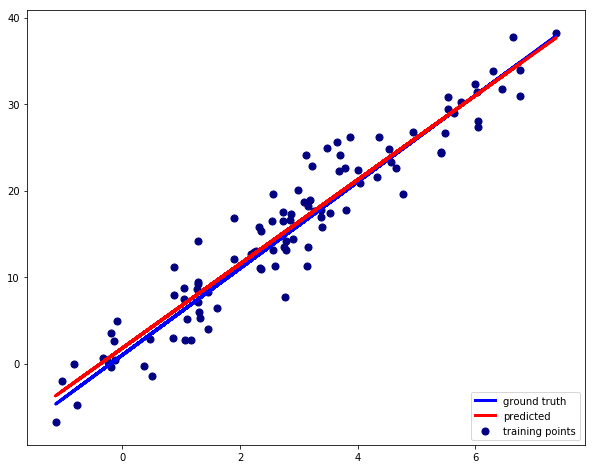

In [169]:
lw=3
plt.plot(a, f(a), color='blue', linewidth=lw, label="ground truth")
plt.scatter(a, y, color='navy', s=50, marker='o', label="training points")
plt.plot(a, m.predict(X), color='red', linewidth=lw, label="predicted")
plt.legend(loc='lower right')

### Shift the input feature by a constant

In [170]:
b = a - 6
X = b.reshape(-1, 1)
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[4.86072831]
30.967708351453943


In [171]:
m.coef_[0]*6

29.1643698312185

As expected, the coefficient did not change, whereas intercept shifted by coef * constant.

Let's plot it.

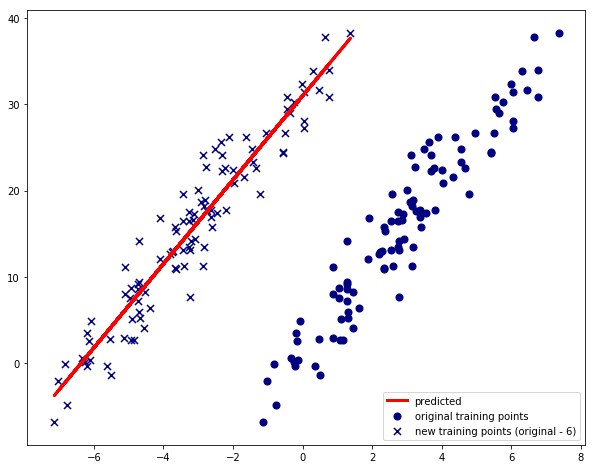

In [172]:
lw=3
plt.scatter(a, y, color='navy', s=50, marker='o', label="original training points")
plt.scatter(b, y, color='navy', s=50, marker='x', label="new training points (original - 6)")
plt.plot(b, m.predict(X), color='red', linewidth=lw, label="predicted")
plt.legend(loc='lower right')

### Scale the feature by a constant

In [173]:
b = 10*a
X = b.reshape(-1, 1)
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[0.48607283]
1.803338520235437


As expected, the intercept did not change, whereas coef is divided by a constant.

Let's plot it.

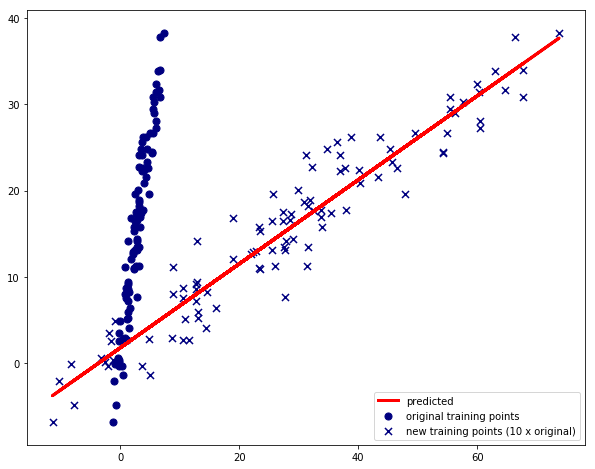

In [174]:
lw=3
plt.scatter(a, y, color='navy', s=50, marker='o', label="original training points")
plt.scatter(b, y, color='navy', s=50, marker='x', label="new training points (10 x original)")
plt.plot(b, m.predict(X), color='red', linewidth=lw, label="predicted")
plt.legend(loc='lower right')

### z-score

In [177]:
np.mean(a)

2.847114680302953

In [193]:
np.std(a)

2.0193783419489146

In [194]:
# new coefficient
4.86 * np.std(a)

9.814178741871725

In [195]:
# new bias
1.80 + np.mean(a)*4.86

15.636977346272353

In [196]:
b = (a - np.mean(a)) / np.std(a)
X = b.reshape(-1, 1)
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[9.81564947]
15.64238943494323


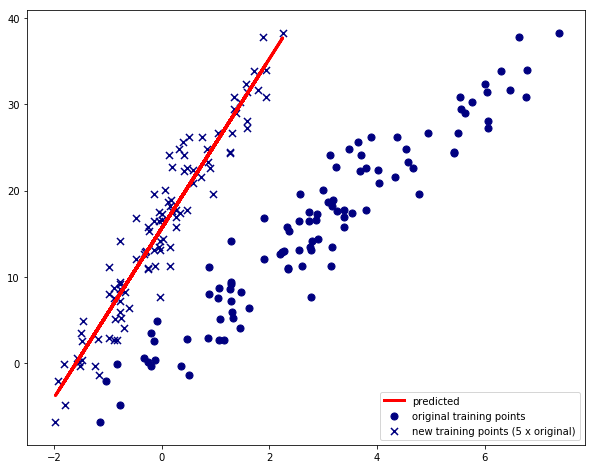

In [197]:
lw=3
plt.scatter(a, y, color='navy', s=50, marker='o', label="original training points")
plt.scatter(b, y, color='navy', s=50, marker='x', label="new training points (5 x original)")
plt.plot(b, m.predict(X), color='red', linewidth=lw, label="predicted")
plt.legend(loc='lower right')

## Multiple Features

### Independent Causes

In [242]:
N = 10000
# a and b are independent causes of y
a = np.random.normal(3, 2, N)
b = np.random.normal(4, 1, N)
X = np.hstack((a.reshape(-1, 1), b.reshape(-1, 1)))
y = np.random.normal(5*a - 3*b + 1, 3)

In [243]:
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[ 5.00832002 -3.01079808]
1.0601473258459846


In [244]:
N = 10000
# c is a cause of b and a and b are causes of y
a = np.random.normal(3, 2, N)
c = np.random.normal(4, 1, N)
b = np.random.normal(2*c, 1)
y = np.random.normal(5*a - 3*b + 1, 3)

In [245]:
X = np.hstack((a.reshape(-1, 1), b.reshape(-1, 1)))

In [246]:
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[ 4.99605636 -3.00356759]
1.066253930470772


In [247]:
X = np.hstack((a.reshape(-1, 1), c.reshape(-1, 1)))

In [248]:
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[ 5.0090351  -5.98526377]
0.8817784030368454


As expected, c's weight is around -6.

In [271]:
X = np.hstack((a.reshape(-1, 1), b.reshape(-1, 1), c.reshape(-1, 1)))

In [272]:
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[ 4.9958828  -3.02700503  0.05846524]
1.0207988326666797


If b is known, c becomes useless.

## Z-scoring

In [283]:
N = 10000
a = np.random.normal(3, 2, N)
b = np.random.normal(3, 5, N)
y = np.random.normal(5*a - 3*b + 1, 3)
X = np.hstack((a.reshape(-1, 1), b.reshape(-1, 1)))

In [284]:
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[ 5.00130258 -2.99811549]
0.9900466450407182


_Which feature is more important do you think? How does the variance of the feature factor into its importance?_

In [289]:
from sklearn.feature_selection import mutual_info_regression

In [290]:
mutual_info_regression(X, y)

array([0.18146994, 0.56304403])

Let's z-score: subtract mean, divide by std

In [291]:
np.mean(X, axis=0)

array([3.00643124, 3.03757033])

In [292]:
np.std(X, axis=0)

array([1.97980818, 5.00458485])

In [293]:
Xz = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [295]:
mutual_info_regression(Xz, y)

array([0.18146994, 0.56304403])

Scaling does not affect mutual info.

In [294]:
m = LinearRegression()
m.fit(Xz, y)
print(m.coef_)
print(m.intercept_)

[  9.90161975 -15.00432337]
6.919132262655795


_Which feature is more important now?_

_Should you z-score?_

_Why subtract the mean?_

### Noisy observation of y

In [296]:
d = np.random.normal(0.25*y+2, 100)

In [297]:
X = np.hstack((a.reshape(-1, 1), b.reshape(-1, 1), c.reshape(-1, 1), d.reshape(-1, 1)))

In [298]:
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[ 5.00075392e+00 -2.99794380e+00  2.79721860e-02  2.44991658e-04]
0.8781510561076562


d is useless and it doesn't affect the weights of others.

In [299]:
d = np.random.normal(0.25*y+2, 0.01)

In [300]:
X = np.hstack((a.reshape(-1, 1), b.reshape(-1, 1), c.reshape(-1, 1), d.reshape(-1, 1)))

In [301]:
m = LinearRegression()
m.fit(X, y)
print(m.coef_)
print(m.intercept_)

[ 1.52841629e-03 -7.90902262e-04  3.03490122e-04  3.99884306e+00]
-7.999393222051919


d is extremely informative and other features are not needed anymore. Note that d's weight is 1/0.25 = 4.

# Regularization